## data exploration

In [1]:
import pandas as pd
import numpy as np
import pathlib

In [2]:
from ydata_profiling import ProfileReport
import missingno
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### load data

In [4]:
csv_filename = pathlib.Path("input", "marketing.csv")

In [5]:
try:
    df = pd.read_csv(csv_filename,na_values='?')
except Exception as e:
    print(f'error: {e}')

In [6]:
# create categorical target from income (i.e. 1=high, 0=low)
df['target'] = np.where(df.income < 5, 0, 1)
df.drop(columns='income',inplace=True)

In [7]:
df.shape

(8993, 14)

In [8]:
df.dtypes

sex                    int64
marital_status       float64
age                    int64
education            float64
occupation           float64
years_in_sf          float64
dual_income            int64
household_members    float64
under_18               int64
household_status     float64
type_of_home         float64
ethnic_class         float64
language             float64
target                 int32
dtype: object

## data exploration

#### a) pandas profile report

note: use a 1k obs sample as report can be quite large

df_sample = df.sample(n=1000)
prof = ProfileReport(df_sample)
prof

#### b) missing data summary

In [9]:
# missing data by column
df.isna().sum()

sex                    0
marital_status       160
age                    0
education             86
occupation           136
years_in_sf          913
dual_income            0
household_members    375
under_18               0
household_status     240
type_of_home         357
ethnic_class          68
language             359
target                 0
dtype: int64

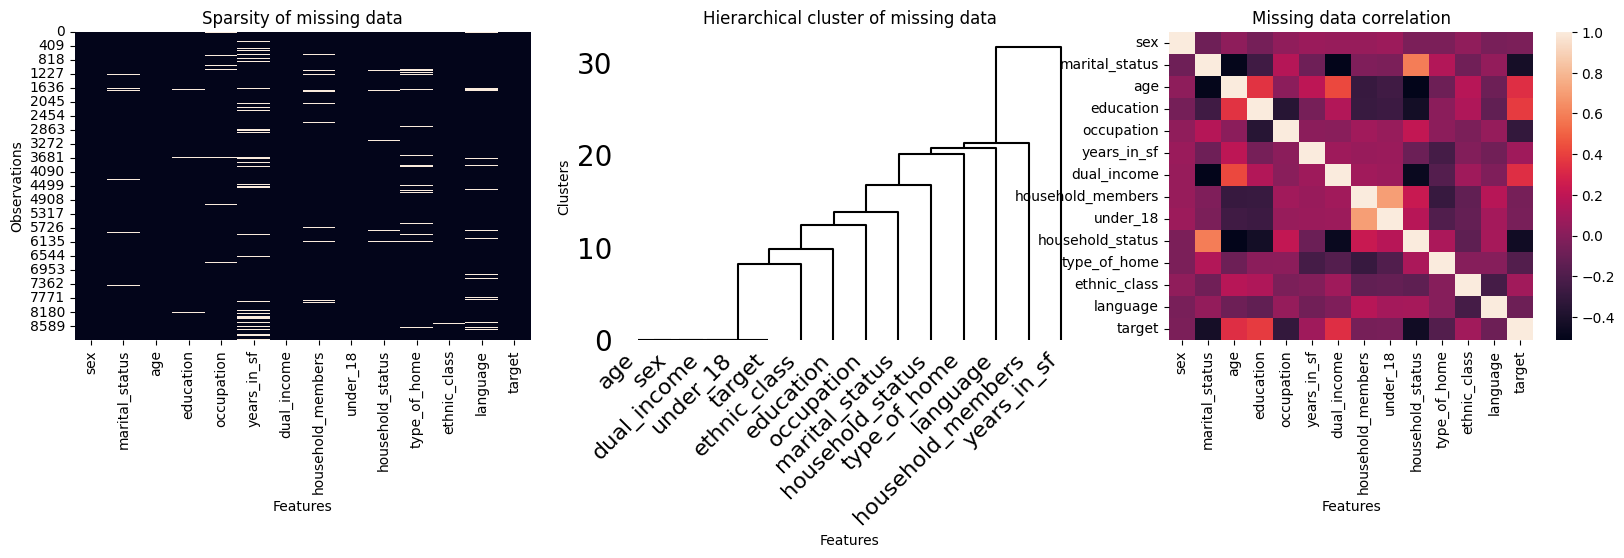

In [10]:
# check for patterns in missing data
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3, sharey=False, figsize=(20,4))
#plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(),cbar=False,ax=ax1)
ax1.set(title='Sparsity of missing data', xlabel='Features', ylabel='Observations')
missingno.dendrogram(df,ax=ax2, orientation = 'top')
ax2.set(title='Hierarchical cluster of missing data', xlabel='Features', ylabel='Clusters')
corr = df.corr()
ax3 = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, robust=True)
ax3.set(title='Missing data correlation', xlabel='Features')
plt.show()

#### c) target barplot

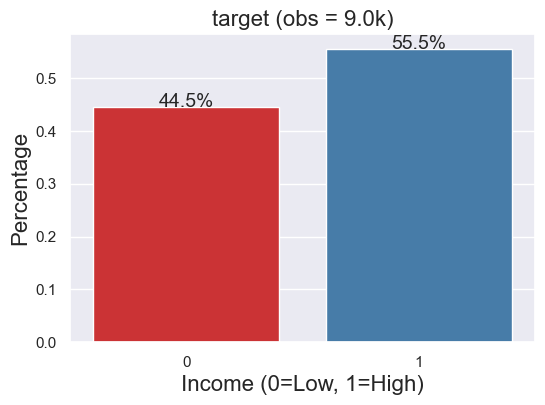

In [11]:
# target barplot 
plt.figure(figsize=(6,4))
sns.set(font_scale=1.0)
g = sns.barplot(x=df['target'],y=df['target'], palette='Set1', estimator=lambda x: len(x) / len(df) )
#Anotating the graph
for p in g.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        g.text(x+width/2, 
               y+height, 
               '{:.1%}'.format(height), 
               horizontalalignment='center',fontsize=14)

#Setting the labels
plt.xlabel('Income (0=Low, 1=High)', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.title(f'target (obs = {len(df)/1000:.1f}k)', fontsize=16)
plt.show()